# Restaurant Datawarehouse
 Data mining by Association on orders dataset of a restaurant to generate frequent item sets and association rules.
 
 ### Schema of the orders dataset :
 
|order_id|item_id|quantity|cust_id|time_id|amount|
|--------|-------|--------|-------|-------|------|
|  O019  | I022  |   2    | C003  | T046  | 350  |
|  O020  | I018  |   5    | C004  | T058  | 575  |
|  O021  | I059  |   1    | C004  | T058  | 105  |


#### Data Manipulation and Processing : 
Pandas, Numpy

#### Apriori and Frequent Itemset Mining :
Mlxtend

#### Data Visualisation :
Matplotlib, NetworkX 

In [18]:
from matplotlib.pyplot import tight_layout, ylabel, scatter, show, xlabel, title
import pandas as pd
import numpy as np
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
pd.options.mode.chained_assignment = None

In [19]:
df_customer = pd.read_csv("customer")
df_orders = pd.read_csv("orders")
df_items = pd.read_csv("items")
df_time = pd.read_csv("time")

df_merge_item_orders = pd.merge(df_orders,df_items,on='item_id',how='left')
df_trans = df_merge_item_orders[['time_id','name','quantity']]
df_pivot = pd.pivot_table(df_trans, values='quantity', index=['time_id'],columns=['name'], aggfunc=np.sum)
print(df_pivot.head(2))

name     Bhindi Fry  Cheese Naan  Naan  Palak Mutter  Paneer Tikka Masala  \
time_id                                                                     
T001            1.0          NaN   NaN           1.0                  1.0   
T002            1.0          NaN   NaN           1.0                  1.0   

name     Rumali Roti  Tawa Biryani  Veg Crispy  Veg Jalfrazi  \
time_id                                                        
T001             1.0           NaN         1.0           NaN   
T002             1.0           NaN         NaN           NaN   

name     Veg Manchurian Dry  Veg Spring Roll  
time_id                                       
T001                    1.0              NaN  
T002                    1.0              1.0  


In [20]:
dataset = []
for y in range(len(df_pivot)):
    l = []
    for x in df_pivot:
        if df_pivot.iloc[y,:][x]>0: l.append(x)
    dataset.append(l)
for x in dataset:
    print(x)

['Bhindi Fry', 'Palak Mutter', 'Paneer Tikka Masala', 'Rumali Roti', 'Veg Crispy', 'Veg Manchurian Dry']
['Bhindi Fry', 'Palak Mutter', 'Paneer Tikka Masala', 'Rumali Roti', 'Veg Manchurian Dry', 'Veg Spring Roll']
['Bhindi Fry', 'Cheese Naan', 'Palak Mutter', 'Veg Crispy', 'Veg Manchurian Dry']
['Bhindi Fry', 'Tawa Biryani', 'Veg Crispy', 'Veg Jalfrazi', 'Veg Manchurian Dry']
['Naan', 'Palak Mutter', 'Paneer Tikka Masala', 'Veg Jalfrazi', 'Veg Manchurian Dry']


In [21]:
tran_encoder = TransactionEncoder()
tran_encoder_ary = tran_encoder.fit(dataset).transform(dataset)
df = pd.DataFrame(tran_encoder_ary, columns=tran_encoder.columns_)
print(df)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print(_rules)
support = _rules['support']
confidence = _rules['confidence']

   Bhindi Fry  Cheese Naan   Naan  Palak Mutter  Paneer Tikka Masala  \
0        True        False  False          True                 True   
1        True        False  False          True                 True   
2        True         True  False          True                False   
3        True        False  False         False                False   
4       False        False   True          True                 True   

   Rumali Roti  Tawa Biryani  Veg Crispy  Veg Jalfrazi  Veg Manchurian Dry  \
0         True         False        True         False                True   
1         True         False       False         False                True   
2        False         False        True         False                True   
3        False          True        True          True                True   
4        False         False       False          True                True   

   Veg Spring Roll  
0            False  
1             True  
2            False  
3            F

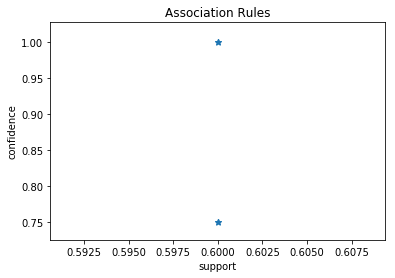

In [22]:
tight_layout(False)
scatter(support, confidence, alpha=0.5, marker="*")
title('Association Rules')
xlabel('support')
ylabel('confidence')
show()

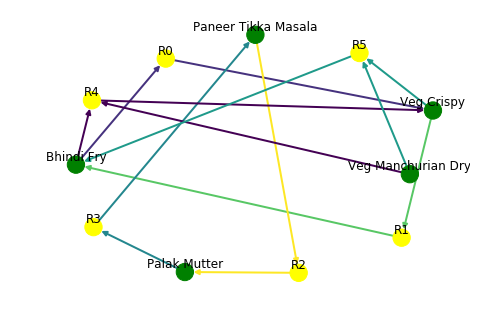

In [23]:
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    for i in range(rules_to_show):
        G1.add_nodes_from(["R" + str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)
    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color=color_map, edge_color=colors, width=weights, font_size=16,with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    show()
    
    
draw_graph(_rules, 6)